In [2]:
import re
import json
import csv
import requests
from bs4 import BeautifulSoup ,SoupStrainer
import pandas as pd 
from io import StringIO
from pathlib import Path  

#!pip install selenium

import os
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service

import sys

import unittest

import time


In [20]:
import pandas as pd
import time
from datetime import datetime, timedelta
import numpy as np; np.random.seed(0)
import warnings
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set_theme()
import datetime
from datetime import datetime
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [33]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn import linear_model


#visualization setup
import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math
from sklearn.preprocessing import MinMaxScaler

In [24]:
def get_infinity_page_html_data(chromedriver_path="./chromedriver.exe", scroll_number=50, sleep_time=2, url = ""):
    # Create selenium driver
    s = Service(chromedriver_path)
    driver = webdriver.Chrome(service=s)
    driver.get(url)

    for i in range(1,scroll_number):
        print(f"scroll_number: {i}")
        driver.execute_script("window.scrollTo(1,100000)")
        time.sleep(sleep_time)
    html_data = driver.page_source
    driver.close()
    
    soup = BeautifulSoup(html_data, 'html.parser')    
    return soup


In [25]:
def make_table(soup):
    table = soup.find_all('table')
    df = pd.read_html(str(table))[0]
    return df

In [26]:
def data_cleaning(df):
    df = df[df["Open"].str.contains("Dividend") == False]
    df = df[df["Open"].str.contains("Stock") == False]
    df.drop(df.tail(1).index,inplace=True)
    return df

In [27]:
def write_to_file(df, path):
    from pathlib import Path
    filepath = Path(path)
    filepath.parent.mkdir(parents=True, exist_ok=True)
    df.to_csv(filepath) 

In [54]:
base_url = "https://finance.yahoo.com/quote/"
period_url = "/history?period1=1262304000&period2=1651881600&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true"
indexes = ["NVDA","AAPL","TSLA","AMD","MSFT","INTC"]
main_df = pd.DataFrame()

for index in indexes:
    soup = get_infinity_page_html_data(url = (base_url + index + period_url))
    table = soup.find_all('table')
    df = pd.read_html(str(table))[0]
    
    df = data_cleaning(df)
    
    path = index + ".csv"
    write_to_file(df, path)
    

scroll_number: 1
scroll_number: 2
scroll_number: 3
scroll_number: 4
scroll_number: 5
scroll_number: 6
scroll_number: 7
scroll_number: 8
scroll_number: 9
scroll_number: 10
scroll_number: 11
scroll_number: 12
scroll_number: 13
scroll_number: 14
scroll_number: 15
scroll_number: 16
scroll_number: 17
scroll_number: 18
scroll_number: 19
scroll_number: 20
scroll_number: 21
scroll_number: 22
scroll_number: 23
scroll_number: 24
scroll_number: 25
scroll_number: 26
scroll_number: 27
scroll_number: 28
scroll_number: 29
scroll_number: 30
scroll_number: 31
scroll_number: 32
scroll_number: 33
scroll_number: 34
scroll_number: 35
scroll_number: 36
scroll_number: 37
scroll_number: 38
scroll_number: 39
scroll_number: 40
scroll_number: 41
scroll_number: 42
scroll_number: 43
scroll_number: 44
scroll_number: 45
scroll_number: 46
scroll_number: 47
scroll_number: 48
scroll_number: 49
scroll_number: 1
scroll_number: 2
scroll_number: 3
scroll_number: 4
scroll_number: 5
scroll_number: 6
scroll_number: 7
scroll_n

In [62]:
indexes = ["NVDA","AAPL","TSLA","AMD","MSFT","INTC"]
main_df = pd.DataFrame()

for index in indexes:
    
    df = pd.read_csv( index + '.csv')
    df.drop(df.index[2500:], inplace=True)
    df.set_index('Date')
   
    
    main_df['Date'] = df['Date']
    main_df[index + " " + "Open"] = df['Open']
    main_df[index + " " + "High"] = df['High']
    main_df[index + " " + "Low"] = df['Low']
    main_df[index + " " + "Close"] = df['Close*']
    main_df[index + " " + "Volume"] = df['Volume']
    main_df[index + " " +'Daily change'] = (((df['Close*']).astype(float))-((df['Open']).astype(float)))/((df['Open']).astype(float))*100
    main_df[index + " " +'Daily change Max'] =  abs((df['High'].astype(float)-df['Low'].astype(float))/df['Low'].astype(float)*100)
    


    
    print(df)
    print(df.info())


main_df['Date'] = df['Date']
main_df.set_index('Date')
write_to_file(main_df, ("main_dataframe" + ".csv"))
main_df

      Unnamed: 0          Date    Open    High     Low  Close*  Adj Close**  \
0              0  May 06, 2022  187.36  195.12  179.90  186.75       186.75   
1              1  May 05, 2022  198.67  199.25  185.00  188.44       188.44   
2              2  May 04, 2022  199.23  204.00  187.51  203.34       203.34   
3              3  May 03, 2022  194.00  198.25  191.33  196.02       196.02   
4              4  May 02, 2022  185.41  195.74  183.91  195.33       195.33   
...          ...           ...     ...     ...     ...     ...          ...   
2495        2534  Jun 07, 2012    3.14    3.16    2.97    2.97         2.73   
2496        2535  Jun 06, 2012    3.04    3.11    3.02    3.10         2.84   
2497        2536  Jun 05, 2012    2.92    3.03    2.92    3.02         2.77   
2498        2537  Jun 04, 2012    3.01    3.03    2.91    2.93         2.69   
2499        2538  Jun 01, 2012    3.04    3.07    2.99    2.99         2.75   

        Volume  
0     63299300  
1     62633100  


,Date,NVDA Open,NVDA High,NVDA Low,NVDA Close,NVDA Volume,NVDA Daily change,NVDA Daily change Max,AAPL Open,AAPL High,...,MSFT Volume,MSFT Daily change,MSFT Daily change Max,INTC Open,INTC High,INTC Low,INTC Close,INTC Volume,INTC Daily change,INTC Daily change Max
0,"May 06, 2022",187.36,195.12,179.90,186.75,63299300,-0.325576,8.460256,156.01,159.44,...,37748300,-0.029111,2.941719,44.49,45.15,43.84,44.30,40910000,-0.427062,2.988139
1,"May 05, 2022",198.67,199.25,185.00,188.44,62633100,-5.149242,7.702703,163.85,164.08,...,43260400,-2.868250,4.377779,45.60,45.91,44.13,44.60,52996700,-2.192982,4.033537
2,"May 04, 2022",199.23,204.00,187.51,203.34,64885500,2.062942,8.794198,159.67,166.48,...,33599300,2.615096,5.113287,45.06,46.64,44.41,46.54,44625600,3.284510,5.021392
3,"May 03, 2022",194.00,198.25,191.33,196.02,47575100,1.041237,3.616788,158.15,160.71,...,25978600,-0.767714,1.420667,44.79,45.49,44.23,45.06,40158400,0.602813,2.848745
4,"May 02, 2022",185.41,195.74,183.91,195.33,57204900,5.350305,6.432494,156.71,158.23,...,35151100,2.434194,3.156904,43.72,44.99,43.51,44.96,45446500,2.836231,3.401517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,"Jun 07, 2012",3.14,3.16,2.97,2.97,52678000,-5.414013,6.397306,20.62,20.62,...,37792800,-1.383266,1.816935,26.37,26.43,25.89,25.94,29534200,-1.630641,2.085747
2496,"Jun 06, 2012",3.04,3.11,3.02,3.10,36896800,1.973684,2.980132,20.28,20.49,...,46860500,1.627424,1.943770,25.51,26.11,25.43,26.07,33553600,2.195218,2.674007
2497,"Jun 05, 2012",2.92,3.03,2.92,3.02,36522400,3.424658,3.767123,20.05,20.23,...,45715400,0.000000,1.268052,25.04,25.57,25.00,25.43,29491300,1.557508,2.280000
2498,"Jun 04, 2012",3.01,3.03,2.91,2.93,43285600,-2.657807,4.123711,20.05,20.27,...,47926300,-0.244584,1.624294,25.28,25.36,24.84,25.04,39903700,-0.949367,2.093398


In [56]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 2499
Data columns (total 48 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   NVDA Date              2500 non-null   object 
 1   NVDA Open              2500 non-null   float64
 2   NVDA High              2500 non-null   float64
 3   NVDA Low               2500 non-null   float64
 4   NVDA Close             2500 non-null   float64
 5   NVDA Volume            2500 non-null   int64  
 6   NVDA Daily change      2500 non-null   float64
 7   NVDA Daily change Max  2500 non-null   float64
 8   AAPL Date              2500 non-null   object 
 9   AAPL Open              2500 non-null   float64
 10  AAPL High              2500 non-null   float64
 11  AAPL Low               2500 non-null   float64
 12  AAPL Close             2500 non-null   float64
 13  AAPL Volume            2500 non-null   int64  
 14  AAPL Daily change      2500 non-null   float64
 15  AAPL

In [80]:
indexes = ["NVDA","AAPL","TSLA","AMD","MSFT","INTC"]

for index in indexes:
      
    main_df[index + " " +'Daily change'] = (((main_df[index + " " +'Close']).astype(float))-((main_df[index + " " +'Open']).astype(float)))/((main_df[index + " " +'Open']).astype(float))*100
    main_df[index + " " +'Daily change Max'] =  abs((main_df[index + " " +'High'].astype(float)-main_df[index + " " +'Low'].astype(float))/main_df[index + " " +'Low'].astype(float)*100)


write_to_file(main_df, ("main_dataframe" + ".csv"))


In [6]:
df = pd.read_csv('main_dataframe.csv')
df.drop('Unnamed: 0', inplace=True, axis=1)
df.dropna(inplace = True, axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 2499
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   2500 non-null   object 
 1   NVDA Open              2500 non-null   float64
 2   NVDA High              2500 non-null   float64
 3   NVDA Low               2500 non-null   float64
 4   NVDA Close             2500 non-null   float64
 5   NVDA Volume            2500 non-null   int64  
 6   NVDA Daily change      2500 non-null   float64
 7   NVDA Daily change Max  2500 non-null   float64
 8   AAPL Open              2500 non-null   float64
 9   AAPL High              2500 non-null   float64
 10  AAPL Low               2500 non-null   float64
 11  AAPL Close             2500 non-null   float64
 12  AAPL Volume            2500 non-null   int64  
 13  AAPL Daily change      2500 non-null   float64
 14  AAPL Daily change Max  2500 non-null   float64
 15  TSLA

In [5]:
df.describe(include='all')
df.to_csv('main_dataframe.csv')

,Date,NVDA Open,NVDA High,NVDA Low,NVDA Close,NVDA Volume,NVDA Daily change,NVDA Daily change Max,AAPL Open,AAPL High,...,MSFT Volume,MSFT Daily change,MSFT Daily change Max,INTC Open,INTC High,INTC Low,INTC Close,INTC Volume,INTC Daily change,INTC Daily change Max
count,2500,2500.000000,2500.000000,2500.000000,2500.000000,2.500000e+03,2500.000000,2500.000000,2500.000000,2500.000000,...,2.500000e+03,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2.500000e+03,2500.000000,2500.000000
unique,2500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,"May 06, 2022",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,55.036220,56.007012,53.956608,55.010704,4.397544e+07,0.054706,3.062827,54.377492,54.962748,...,3.331913e+07,0.044444,1.850186,40.120048,40.553280,39.702296,40.136216,3.001400e+07,0.054467,2.060457
std,NaN,70.818638,72.240196,69.149726,70.709059,2.588744e+07,2.129932,1.887537,43.939634,44.488901,...,1.743158e+07,1.245177,1.117357,12.325563,12.510381,12.136461,12.322022,1.541830e+07,1.388051,1.251787
min,NaN,2.870000,2.910000,2.790000,2.850000,4.564400e+06,-10.580964,0.723327,13.860000,14.270000,...,7.425600e+06,-5.924658,0.375509,19.520000,19.550000,19.230000,19.360000,5.893800e+06,-6.818865,0.476417
25%,NaN,4.930000,4.990000,4.870000,4.920000,2.748940e+07,-1.003136,1.831410,24.575000,24.805000,...,2.273332e+07,-0.599056,1.160418,30.237500,30.560000,29.950000,30.340000,2.042192e+07,-0.680199,1.308157
50%,NaN,32.700000,33.660000,31.905000,32.845000,3.759320e+07,0.007453,2.524539,36.265000,36.540000,...,2.914835e+07,0.053735,1.556730,36.555000,36.890000,36.295000,36.570000,2.645245e+07,0.057092,1.755663
75%,NaN,62.982500,63.650000,62.090000,62.995000,5.256732e+07,1.178003,3.698139,61.850000,63.377500,...,3.829908e+07,0.746700,2.189969,50.555000,51.222500,49.972500,50.627500,3.479328e+07,0.768131,2.456795


In [7]:
df['Date'] = pd.to_datetime(df['Date']).copy()
df["Date"]= pd.to_datetime(df.Date,format="%Y-%m-%d").copy()
#df['Date'] = pd.to_numeric(pd.to_datetime(df['Date'])).copy()
i = 0
df["Day"] = 0 
while i  < 2500:
    temp = pd.Timestamp(df["Date"][i])
    df['Day'][i] = temp.dayofweek
    i=i+1

C:\Users\vikto\AppData\Local\Temp/ipykernel_35548/314205087.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day'][i] = temp.dayofweek


In [8]:
df.head()

,Date,NVDA Open,NVDA High,NVDA Low,NVDA Close,NVDA Volume,NVDA Daily change,NVDA Daily change Max,AAPL Open,AAPL High,...,MSFT Daily change,MSFT Daily change Max,INTC Open,INTC High,INTC Low,INTC Close,INTC Volume,INTC Daily change,INTC Daily change Max,Day
0,2022-05-06,187.36,195.12,179.90,186.75,63299300,-0.325576,8.460256,156.01,159.44,...,-0.029111,2.941719,44.49,45.15,43.84,44.30,40910000,-0.427062,2.988139,4
1,2022-05-05,198.67,199.25,185.00,188.44,62633100,-5.149242,7.702703,163.85,164.08,...,-2.868250,4.377779,45.60,45.91,44.13,44.60,52996700,-2.192982,4.033537,3
2,2022-05-04,199.23,204.00,187.51,203.34,64885500,2.062942,8.794198,159.67,166.48,...,2.615096,5.113287,45.06,46.64,44.41,46.54,44625600,3.284510,5.021392,2
3,2022-05-03,194.00,198.25,191.33,196.02,47575100,1.041237,3.616788,158.15,160.71,...,-0.767714,1.420667,44.79,45.49,44.23,45.06,40158400,0.602813,2.848745,1
4,2022-05-02,185.41,195.74,183.91,195.33,57204900,5.350305,6.432494,156.71,158.23,...,2.434194,3.156904,43.72,44.99,43.51,44.96,45446500,2.836231,3.401517,0


D:\Programs\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Day', ylabel='TSLA Daily change'>

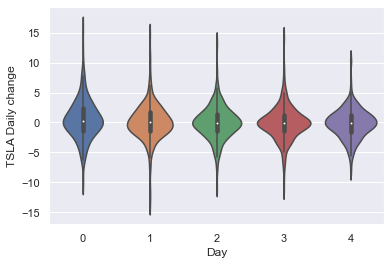

In [9]:
tdf = pd.DataFrame(df, columns = ['Day','TSLA Daily change'])
sns.violinplot(tdf.Day , tdf['TSLA Daily change'])

D:\Programs\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Day', ylabel='NVDA Daily change'>

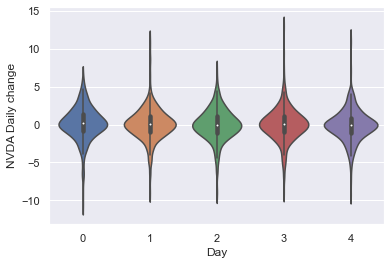

In [10]:
tdf = pd.DataFrame(df, columns = ['Day','NVDA Daily change'])
sns.violinplot(tdf.Day , tdf['NVDA Daily change'])

D:\Programs\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Day', ylabel='TSLA Daily change'>

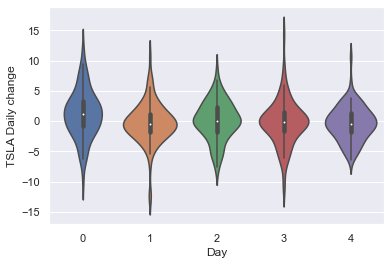

In [11]:
tdf = pd.DataFrame(df, columns = ['Day','TSLA Daily change'])
tdf.drop(tdf.index[500:2548], inplace=True) 
sns.violinplot(tdf.Day , tdf['TSLA Daily change'])

D:\Programs\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Day', ylabel='NVDA Daily change'>

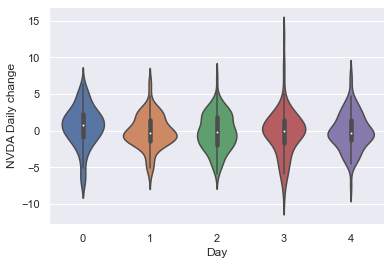

In [12]:
tdf = pd.DataFrame(df, columns = ['Day','NVDA Daily change'])
tdf.drop(tdf.index[500:2548], inplace=True) 
sns.violinplot(tdf.Day , tdf['NVDA Daily change'])

<AxesSubplot:>

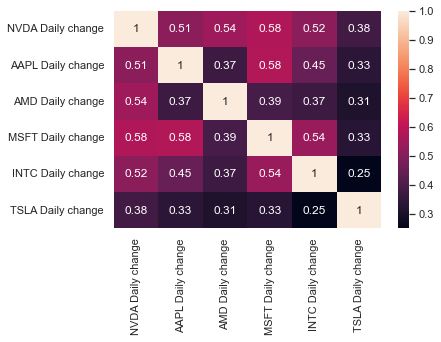

In [13]:
tdf = pd.DataFrame(df, columns = ['NVDA Daily change','AAPL Daily change','AMD Daily change','MSFT Daily change','INTC Daily change','TSLA Daily change'])

#tdf.drop(tdf.index[300:2548], inplace=True)

#tdf.tail()


sns.heatmap(tdf.corr(), annot=True)

<AxesSubplot:>

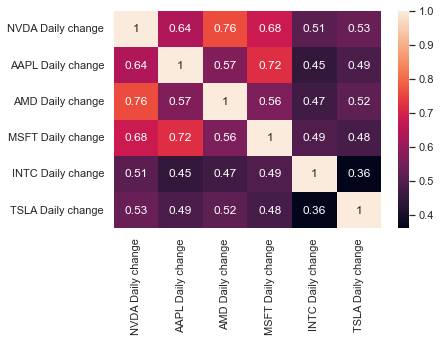

In [14]:
tdf = pd.DataFrame(df, columns = ['NVDA Daily change','AAPL Daily change','AMD Daily change','MSFT Daily change','INTC Daily change','TSLA Daily change'])

tdf.drop(tdf.index[500:2548], inplace=True)

#tdf.tail()


sns.heatmap(tdf.corr(), annot=True)

<AxesSubplot:>

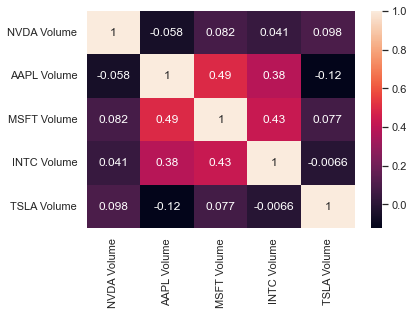

In [15]:
tdf = pd.DataFrame(df, columns = ['NVDA Volume','AAPL Volume','AMD Volume','MSFT Volume','INTC Volume','TSLA Volume'])
sns.heatmap(tdf.corr(), annot=True)

<AxesSubplot:>

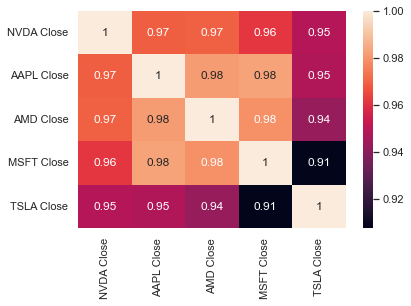

In [16]:
tdf = pd.DataFrame(df, columns = ['NVDA Close','AAPL Close','AMD Close','MSFT Close','TSLA Close'])
sns.heatmap(tdf.corr(), annot=True)

<AxesSubplot:>

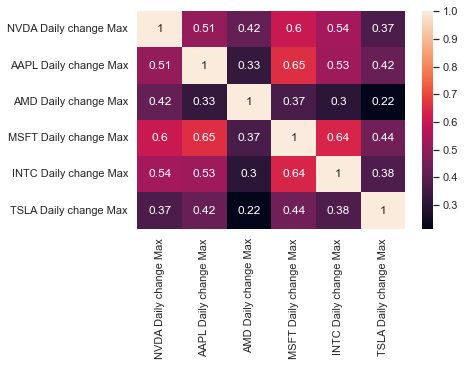

In [17]:
tdf = pd.DataFrame(df, columns = ['NVDA Daily change Max','AAPL Daily change Max','AMD Daily change Max','MSFT Daily change Max','INTC Daily change Max','TSLA Daily change Max'])
sns.heatmap(tdf.corr(), annot=True)

<AxesSubplot:>

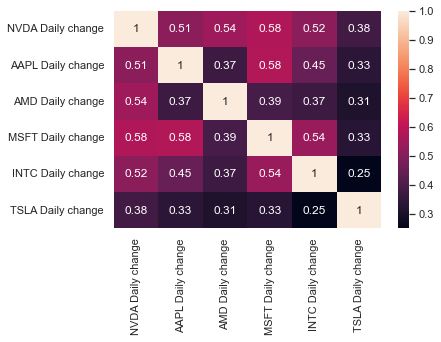

<AxesSubplot:>

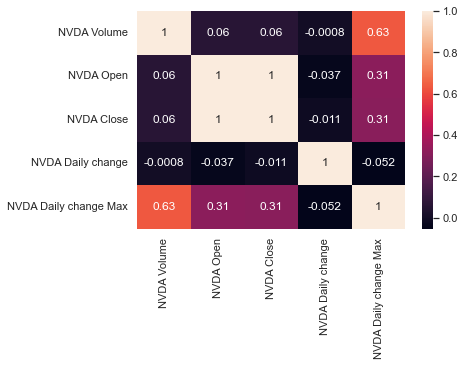

In [19]:
tdf = pd.DataFrame(df, columns = ['NVDA Volume','NVDA Open','NVDA Close','NVDA Daily change','NVDA Daily change Max'])
sns.heatmap(tdf.corr(), annot=True)

In [22]:
df = pd.read_csv('main_dataframe.csv')

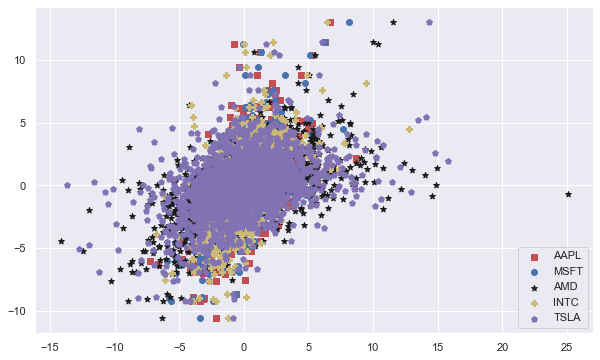

In [25]:
plt.scatter(x=df['AAPL Daily change'],y=df['NVDA Daily change'],c='r',marker='s',label='AAPL')
plt.scatter(x=df['MSFT Daily change'],y=df['NVDA Daily change'],c='b',marker='o',label='MSFT')
plt.scatter(x=df['AMD Daily change'],y=df['NVDA Daily change'],c='k',marker='*',label='AMD')
plt.scatter(x=df['INTC Daily change'],y=df['NVDA Daily change'],c='y',marker='P',label='INTC')
plt.scatter(x=df['TSLA Daily change'],y=df['NVDA Daily change'],c='m',marker='p',label='TSLA')
plt.legend(numpoints=2,loc=4)
plt.show()


In [26]:
tdf = pd.DataFrame(df, columns = ['NVDA Close'])
tdf['Predicted Close'] = ((df['NVDA Open']*5+df['AAPL Daily change']*df['NVDA Open']/100+df['AMD Daily change']*df['NVDA Open']/100+df['INTC Daily change']*df['NVDA Open']/100+df['MSFT Daily change']*df['NVDA Open']/100+df['TSLA Daily change']*df['NVDA Open']/100)/5) 
tdf
tdf.drop(tdf.index[1000:2548], inplace=True)        

In [27]:
m=linear_model.LinearRegression().fit(tdf.iloc[:,1:2],tdf.iloc[:,0:1])

C:\Users\vikto\AppData\Local\Temp/ipykernel_35548/764479585.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.1, 0.1, 0.1, 1)). The keyword argument will take precedence.
  plt.plot(tdf['Predicted Close'],m.predict(tdf.iloc[:,1:2]),'k',color='blue',linewidth=3)


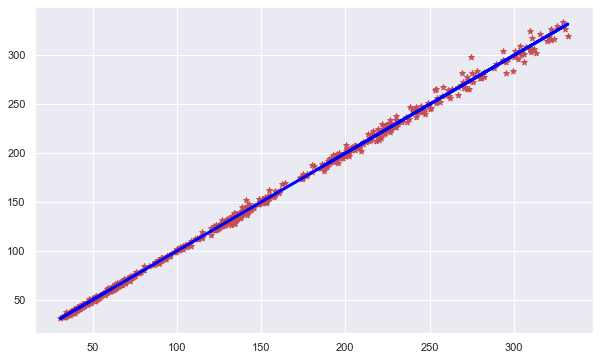

In [28]:
plt.scatter(x=tdf['Predicted Close'],y=tdf['NVDA Close'],c='r',marker='*',label='Index')
plt.plot(tdf['Predicted Close'],m.predict(tdf.iloc[:,1:2]),'k',color='blue',linewidth=3)
plt.show()

In [29]:
print("b1:",m.coef_)
print("b0:",m.intercept_)

b1: [[0.99792163]]
b0: [0.15412335]


In [30]:
def sse(Y, Y_HAT):  
    sse = sum([(y - y_hat)**2 for y,y_hat in zip(Y, Y_HAT)])
    return sse

SSE = sse(tdf['NVDA Close'].tolist(),m.predict(tdf.iloc[:,1:2]).flatten())

print(SSE)

6334.358276175956


In [31]:
mean_squared_error(tdf['NVDA Close'].tolist(),m.predict(tdf.iloc[:,1:2]).flatten())*len(tdf['NVDA Close'].tolist())

6334.358276175948

In [32]:
r2_score(tdf['NVDA Close'].tolist(),m.predict(tdf.iloc[:,1:2]).flatten())

0.9989491250995026

In [94]:
df = pd.read_csv('main_dataframe.csv')

In [95]:
tdf = pd.DataFrame(df, columns = ['Date','NVDA Close','AAPL Close','AMD Close','MSFT Close','TSLA Close'])
tdf = tdf.iloc[::-1]
tdf = tdf.tail(500)  

In [96]:
close_data = tdf.filter(['NVDA Close'])
dataset = close_data.values

In [97]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [98]:
training_data_len = math.ceil(len(dataset) *.8)
train_data = scaled_data[0:training_data_len  , : ]

In [99]:
x_train_data=[]
y_train_data =[]
for i in range(60,len(train_data)):
    x_train_data=list(x_train_data)
    y_train_data=list(y_train_data)
    x_train_data.append(train_data[i-60:i,0])
    y_train_data.append(train_data[i,0])
    
    x_train_data1, y_train_data1 = np.array(x_train_data), np.array(y_train_data)
    
    x_train_data2 = np.reshape(x_train_data1, (x_train_data1.shape[0],x_train_data1.shape[1],1))

In [100]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train_data2.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [101]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train_data2, y_train_data1, batch_size=1, epochs=1)

340/340 [==============================] - 4s 8ms/step - loss: 0.0052


In [102]:
test_data = scaled_data[training_data_len - 60: , : ]
x_test = []
y_test =  dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [103]:
x_test = np.array(x_test)

In [104]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [105]:
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
print(rmse)

18.215237917282103


C:\Users\vikto\AppData\Local\Temp/ipykernel_35548/2931567003.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


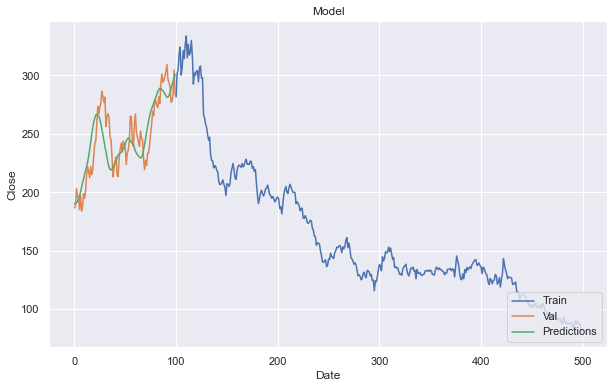

In [106]:
train = tdf[:training_data_len]
valid = tdf[training_data_len:]
 
valid['Predictions'] = predictions
 
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close')
 
plt.plot(train['NVDA Close'])
plt.plot(valid[['NVDA Close', 'Predictions']])
 
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
 
plt.show()

In [107]:
Data = list(zip(predictions, y_test))
df = pd.DataFrame(Data,columns=['Predictions', 'Actual'])
df

,Predictions,Actual
0,[300.93384],[283.37]
1,[297.20834],[304.59]
2,[294.71936],[283.87]
3,[291.7839],[278.01]
4,[288.4805],[277.19]
...,...,...
95,[194.56708],[195.33]
96,[192.49495],[196.02]
97,[191.14067],[203.34]
98,[190.79495],[188.44]


In [309]:
df = pd.read_csv('main_dataframe.csv')

In [310]:
tdf = pd.DataFrame(df, columns = ['Date','NVDA Close','NVDA Open','NVDA Low','NVDA High','NVDA Volume'])
tdf = tdf.iloc[::-1]
tdf = tdf.tail(500)  

In [311]:
close_data = tdf.filter(['NVDA Close'])
dataset = close_data.values

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

training_data_len = math.ceil(len(dataset) *.8)
train_data = scaled_data[0:training_data_len  , : ]



In [312]:
x_train_data=[]
y_train_data =[]
for i in range(60,len(train_data)):
    x_train_data=list(x_train_data)
    y_train_data=list(y_train_data)
    x_train_data.append(train_data[i-60:i,0])
    y_train_data.append(train_data[i,0])
    
    x_train_data1, y_train_data1 = np.array(x_train_data), np.array(y_train_data)
    
    x_train_data2 = np.reshape(x_train_data1, (x_train_data1.shape[0],x_train_data1.shape[1],1))

In [313]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train_data2.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [314]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train_data2, y_train_data1, batch_size=1, epochs=1)

340/340 [==============================] - 4s 8ms/step - loss: 0.0050


In [315]:
test_data = scaled_data[training_data_len - 60: , : ]
x_test = []
y_test =  dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [316]:
x_test = np.array(x_test)

In [317]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [318]:
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
print(rmse)

21.68927375212881


C:\Users\vikto\AppData\Local\Temp/ipykernel_35548/2931567003.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


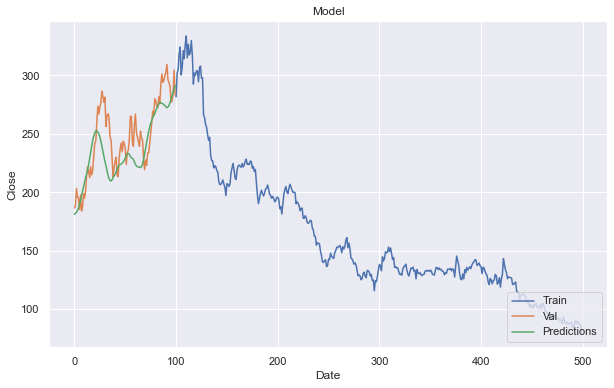

In [319]:
train = tdf[:training_data_len]
valid = tdf[training_data_len:]
 
valid['Predictions'] = predictions
 
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close')
 
plt.plot(train['NVDA Close'])
plt.plot(valid[['NVDA Close', 'Predictions']])
 
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
 
plt.show()

In [560]:
tdf = pd.read_csv('main_dataframe.csv')
tdf = tdf.iloc[::-1]
tdf = tdf.tail(500) 
X = 10 #prediction sepmle 

In [561]:
close_data = tdf.filter(['NVDA Close'])
dataset = close_data.values

In [562]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [563]:
training_data_len = math.ceil(len(dataset) *.8)
train_data = scaled_data[0:training_data_len  , : ]

In [564]:
x_train_data=[]
y_train_data =[]
for i in range(X,len(train_data)):
    x_train_data=list(x_train_data)
    y_train_data=list(y_train_data)
    x_train_data.append(train_data[i-X:i,0])
    y_train_data.append(train_data[i,0])
    
    x_train_data1, y_train_data1 = np.array(x_train_data), np.array(y_train_data)
    
    x_train_data2 = np.reshape(x_train_data1, (x_train_data1.shape[0],x_train_data1.shape[1],1))

In [565]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train_data2.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [566]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train_data2, y_train_data1, batch_size=1, epochs=1)

390/390 [==============================] - 2s 2ms/step - loss: 0.0062


In [567]:
test_data = scaled_data[training_data_len - X
                        : , : ]
x_test = []
y_test =  dataset[training_data_len : , : ]
for i in range(X,len(test_data)):
    x_test.append(test_data[i-X:i,0])

In [568]:
x_test = np.array(x_test)
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [569]:
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
print(rmse)

18.46273978395024


C:\Users\vikto\AppData\Local\Temp/ipykernel_35548/2931567003.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


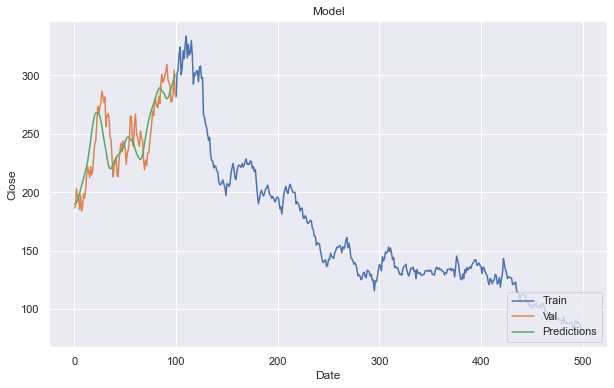

In [570]:
train = tdf[:training_data_len]
valid = tdf[training_data_len:]
 
valid['Predictions'] = predictions
 
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close')
 
plt.plot(train['NVDA Close'])
plt.plot(valid[['NVDA Close', 'Predictions']])
 
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
 
plt.show()